# 第14回演習「バンディットアルゴリズム」その2

## 6) まずここを実行しましょう

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

回数毎の平均報酬=[]
回数毎の累積報酬=[]
一回のシミュレーションで引く回数=250
シミュレーションの回数=3000
乱数発生器 = np.random.RandomState(3)
#乱数発生器 = np.random

class アーム():
    def __init__(self,確率):
        self.確率=確率
        self.引いた回数=0
        self.平均報酬=0
    def アームの初期化(self):
        self.引いた回数=0
        self.平均報酬=0        
    def 平均報酬を更新(self,この報酬):
        n=self.引いた回数
        self.平均報酬=((n-1)*self.平均報酬+この報酬)/n        
    def 引く(self):
        乱数_0から1まで = 乱数発生器.uniform(0, 1)
        if 乱数_0から1まで <= self.確率:
            この報酬=1
        else:
            この報酬=0
        self.引いた回数=self.引いた回数+1
        self.平均報酬を更新(この報酬)
        return この報酬

アーム1=アーム(0.1)
アーム2=アーム(0.1)
アーム3=アーム(0.1)
アーム4=アーム(0.1)
アーム5=アーム(0.9)
アームの配列=[アーム1,アーム2,アーム3,アーム4,アーム5]

def 平均報酬最大のアームのインデックスを知る(アームの配列):
    暫定最大値 = -1
    暫定最大インデックスの配列=[]
    for このアームのインデックス in range(len(アームの配列)):
        if アームの配列[このアームのインデックス].平均報酬 > 暫定最大値:
            暫定最大値=アームの配列[このアームのインデックス].平均報酬
            暫定最大インデックスの配列=[このアームのインデックス]
        elif アームの配列[このアームのインデックス].平均報酬 == 暫定最大値:
            暫定最大インデックスの配列.append(このアームのインデックス)
    return 乱数発生器.choice(暫定最大インデックスの配列)

def εグリーディ法でアームを決定(ランダム行動の選択率ε,アームの配列):
    乱数_0から1まで = 乱数発生器.uniform(0, 1)
    # 乱数がε以上なら、平均報酬最大のアームを選択    
    if ランダム行動の選択率ε <= 乱数_0から1まで:
        平均報酬最大のインデックス=平均報酬最大のアームのインデックスを知る(アームの配列)
        return 平均報酬最大のインデックス
    # 乱数がε未満なら、ランダムなアーム
    else:
        return 乱数発生器.randint(len(アームの配列))
    
def εグリーディ法でシミュレーション(アームの配列,一回のシミュレーションで引く回数,シミュレーションの回数,ランダム行動の選択率ε):
    global 回数毎の平均報酬 # グローバル変数を弄るので
    global 回数毎の累積報酬 # グローバル変数を弄るので
    回数毎の平均報酬=[]
    回数毎の累積報酬=[]
    
    for 回数 in range(一回のシミュレーションで引く回数):
        回数毎の平均報酬.append([]) # 空にする
        回数毎の累積報酬.append([]) # 空にする        

    for このシミュレーション in range(シミュレーションの回数):
        このシミュレーションの報酬総額=0
        for このアーム in アームの配列:        
            このアーム.アームの初期化()

        #print("==========================================")
        #print("解の番号, 引いたアームのインデックス, 得た報酬, このアームを引いた回数, このアームの平均報酬, このシミュレーション内の平均報酬")                
        for この回 in range(一回のシミュレーションで引く回数):            
            決めたアームのインデックス=εグリーディ法でアームを決定(ランダム行動の選択率ε,アームの配列)
            このアーム=アームの配列[決めたアームのインデックス]
            得た報酬=このアーム.引く()
            このシミュレーションの報酬総額=このシミュレーションの報酬総額+得た報酬
            このシミュレーションの平均報酬=このシミュレーションの報酬総額/(この回+1)        
            #print(この回,"",end="")
            #print(決めたアームのインデックス,end="")            
            #print("",得た報酬,このアーム.引いた回数,このアーム.平均報酬,end="")
            #print("",このシミュレーションの平均報酬)            
            回数毎の平均報酬[この回].append(このシミュレーションの平均報酬)
            回数毎の累積報酬[この回].append(このシミュレーションの報酬総額)
        #print("解の番号, 引いたアームのインデックス, 得た報酬, このアームを引いた回数, このアームの平均報酬, このシミュレーション内の平均報酬")                        

print("#6 を実行しました")

#6 を実行しました


## 7) ε=0.5として「250回のアーム選択」を<br />3000回シミュレーションし、回数毎の平均報酬を<br />テキストとして出力<br />【注】 5～10秒程度、待たされます

In [2]:
def 回数毎の平均報酬をテキストとして表示(一回のシミュレーションで引く回数):
    for 回数 in range(一回のシミュレーションで引く回数):
        print(回数,np.mean(回数毎の平均報酬[回数]))

一回のシミュレーションで引く回数=250
シミュレーションの回数=3000        
εグリーディ法でシミュレーション(アームの配列,一回のシミュレーションで引く回数,シミュレーションの回数,0.5)
回数毎の平均報酬をテキストとして表示(一回のシミュレーションで引く回数)

0 0.2643333333333333
1 0.28783333333333333
2 0.31055555555555553
3 0.3288333333333333
4 0.34293333333333337
5 0.3572222222222223
6 0.36904761904761896
7 0.37916666666666665
8 0.38914814814814813
9 0.3973999999999999
10 0.4064545454545454
11 0.4149722222222222
12 0.42143589743589743
13 0.4265238095238096
14 0.4324
15 0.43804166666666666
16 0.4435490196078431
17 0.44790740740740737
18 0.45231578947368417
19 0.45670000000000005
20 0.46047619047619043
21 0.4652121212121212
22 0.4687826086956522
23 0.47198611111111116
24 0.47516
25 0.47806410256410253
26 0.48060493827160494
27 0.48375
28 0.48626436781609195
29 0.4883222222222222
30 0.49115053763440863
31 0.4938020833333333
32 0.4959494949494949
33 0.49851960784313726
34 0.5003333333333333
35 0.5025925925925926
36 0.5041531531531531
37 0.5063070175438595
38 0.5082905982905983
39 0.5104083333333334
40 0.5117804878048781
41 0.5133888888888888
42 0.5145426356589148
43 0.5159924242424242
44 0.5173481481481481
45 0.5187971014492754
46 0.519709219

## 小出しの任意課題6) 
<span style="background-color:#FFFF99">上記#6を2~3回実行して250回目の平均報酬のブレが許容範囲内であることを確認しましょう。</span><br />【注】 5～10秒程度、待たされます<hr />

In [4]:
εグリーディ法でシミュレーション(アームの配列,一回のシミュレーションで引く回数,シミュレーションの回数,0.5)
回数毎の平均報酬をテキストとして表示(一回のシミュレーションで引く回数)

0 0.25533333333333336
1 0.281
2 0.30766666666666664
3 0.3269166666666667
4 0.3406
5 0.356
6 0.3678571428571428
7 0.381125
8 0.3925925925925926
9 0.4003333333333333
10 0.40939393939393937
11 0.4161944444444444
12 0.4236666666666667
13 0.43052380952380953
14 0.4364222222222222
15 0.4415625
16 0.4464313725490196
17 0.451
18 0.45592982456140346
19 0.46075
20 0.4652698412698413
21 0.46931818181818186
22 0.4734347826086956
23 0.4770972222222222
24 0.48035999999999995
25 0.4829871794871795
26 0.4856543209876544
27 0.4885833333333333
28 0.4919540229885057
29 0.4947222222222222
30 0.4968172043010753
31 0.49907291666666664
32 0.5018484848484849
33 0.5040294117647058
34 0.5058285714285713
35 0.5071388888888889
36 0.508945945945946
37 0.5107105263157894
38 0.5129059829059829
39 0.514375
40 0.516
41 0.5176031746031746
42 0.5193023255813953
43 0.5206515151515152
44 0.5222
45 0.5236449275362318
46 0.5246028368794325
47 0.5255763888888888
48 0.5268503401360545
49 0.5277266666666667
50 0.52878431372549

## 8) εを0.5で「250回のアーム選択」を3000回シミュレーションし、回数毎の平均報酬を図示<br />【注】 5～10秒程度、待たされます

250
3000


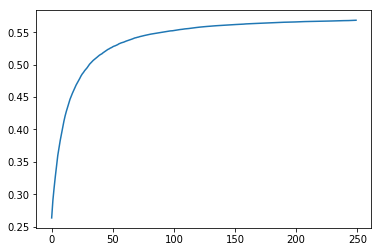

In [6]:
def 回数毎の平均報酬をプロット(ラベル,一回のシミュレーションで引く回数):
    図示用のY=[]
    for 回数 in range(一回のシミュレーションで引く回数):
        図示用のY.append(np.mean(回数毎の平均報酬[回数]))
    plt.plot(図示用のY,label=ラベル)

print(一回のシミュレーションで引く回数)
print(シミュレーションの回数)
εグリーディ法でシミュレーション(アームの配列,一回のシミュレーションで引く回数,シミュレーションの回数,0.5)
回数毎の平均報酬をプロット(0.5,一回のシミュレーションで引く回数)
plt.show()

## 9) εを0.1⇒0.3⇒0.5と変えながら「250回のアーム選択」をそれぞれ3000回シミュレーションし、回数毎の平均報酬を図示<br />【注】 それぞれ5～10秒程度、待たされます

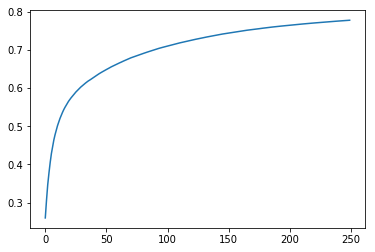

In [7]:
# ε=0.1
εグリーディ法でシミュレーション(アームの配列,一回のシミュレーションで引く回数,シミュレーションの回数,0.1)
回数毎の平均報酬をプロット(0.1,一回のシミュレーションで引く回数)
plt.show()
# ↓待たされます

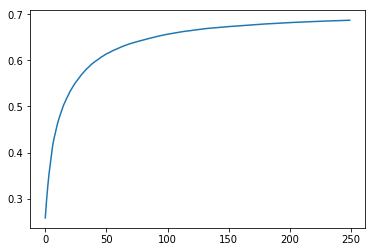

In [8]:
# ε=0.3
εグリーディ法でシミュレーション(アームの配列,一回のシミュレーションで引く回数,シミュレーションの回数,0.3)
回数毎の平均報酬をプロット(0.3,一回のシミュレーションで引く回数)
plt.show()
# ↓待たされます

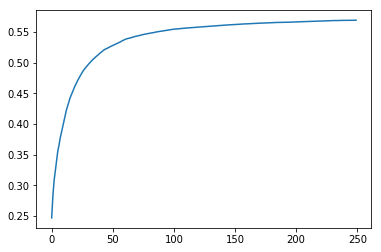

In [9]:
# ε=0.5
εグリーディ法でシミュレーション(アームの配列,一回のシミュレーションで引く回数,シミュレーションの回数,0.5)
回数毎の平均報酬をプロット(0.5,一回のシミュレーションで引く回数)
plt.show()
# ↓待たされます

## 10) プログラム#9の3つの結果を重ねてプロットし、<br />凡例もつける<br />【注】 全体で20秒程度、待たされます

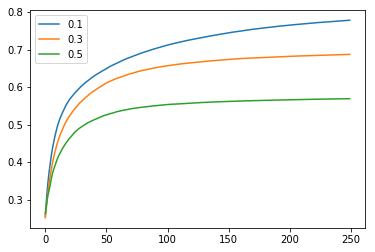

In [10]:
εグリーディ法でシミュレーション(アームの配列,一回のシミュレーションで引く回数,シミュレーションの回数,0.1)
回数毎の平均報酬をプロット(0.1,一回のシミュレーションで引く回数)

εグリーディ法でシミュレーション(アームの配列,一回のシミュレーションで引く回数,シミュレーションの回数,0.3)
回数毎の平均報酬をプロット(0.3,一回のシミュレーションで引く回数)

εグリーディ法でシミュレーション(アームの配列,一回のシミュレーションで引く回数,シミュレーションの回数,0.5)
回数毎の平均報酬をプロット(0.5,一回のシミュレーションで引く回数)

plt.legend(loc='best')
plt.show()
# ↓待たされます

## 11) εを0.1⇒0.3⇒0.5と変え、回数毎の累積報酬を図示<br />【注】 全体で20秒程度、待たされます

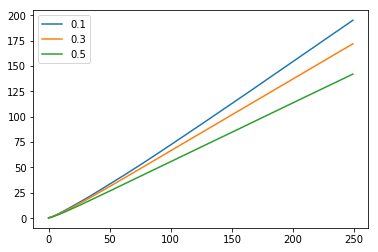

In [11]:
def 回数毎の累積報酬をプロット(ラベル,一回のシミュレーションで引く回数):
    図示用のY=[]
    for 回数 in range(一回のシミュレーションで引く回数):
        図示用のY.append(np.mean(回数毎の累積報酬[回数]))
    plt.plot(図示用のY,label=ラベル)

εグリーディ法でシミュレーション(アームの配列,一回のシミュレーションで引く回数,シミュレーションの回数,0.1)
回数毎の累積報酬をプロット(0.1,一回のシミュレーションで引く回数)

εグリーディ法でシミュレーション(アームの配列,一回のシミュレーションで引く回数,シミュレーションの回数,0.3)
回数毎の累積報酬をプロット(0.3,一回のシミュレーションで引く回数)

εグリーディ法でシミュレーション(アームの配列,一回のシミュレーションで引く回数,シミュレーションの回数,0.5)
回数毎の累積報酬をプロット(0.5,一回のシミュレーションで引く回数)

plt.legend(loc='best')
plt.show()
# ↓待たされます

## 12) ε=0 での平均報酬を図示し、<br />0.1⇒0.3⇒0.5の平均報酬の図に重ねる<br />【注】 全体で20秒程度、待たされます

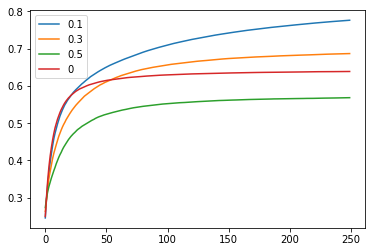

In [12]:
εグリーディ法でシミュレーション(アームの配列,一回のシミュレーションで引く回数,シミュレーションの回数,0.1)
回数毎の平均報酬をプロット(0.1,一回のシミュレーションで引く回数)

εグリーディ法でシミュレーション(アームの配列,一回のシミュレーションで引く回数,シミュレーションの回数,0.3)
回数毎の平均報酬をプロット(0.3,一回のシミュレーションで引く回数)

εグリーディ法でシミュレーション(アームの配列,一回のシミュレーションで引く回数,シミュレーションの回数,0.5)
回数毎の平均報酬をプロット(0.5,一回のシミュレーションで引く回数)

εグリーディ法でシミュレーション(アームの配列,一回のシミュレーションで引く回数,シミュレーションの回数,0) # εは0
回数毎の平均報酬をプロット(0,一回のシミュレーションで引く回数)

plt.legend(loc='best')
plt.show()
# ↓待たされます

## 小出しの任意課題7) 
<span style="background-color:#FFFF99">ε=0がε=0.1に平均報酬で抜かれたのはなぜか、考えましょう。</span><hr />

## 13) プログラム#12と同様、ε=1を試して図示<br />【注】 全体で20秒程度、待たされます

In [ ]:
εグリーディ法でシミュレーション(アームの配列,一回のシミュレーションで引く回数,シミュレーションの回数,0.1)
回数毎の平均報酬をプロット(0.1,一回のシミュレーションで引く回数)

εグリーディ法でシミュレーション(アームの配列,一回のシミュレーションで引く回数,シミュレーションの回数,0.3)
回数毎の平均報酬をプロット(0.3,一回のシミュレーションで引く回数)

εグリーディ法でシミュレーション(アームの配列,一回のシミュレーションで引く回数,シミュレーションの回数,0.5)
回数毎の平均報酬をプロット(0.5,一回のシミュレーションで引く回数)

εグリーディ法でシミュレーション(アームの配列,一回のシミュレーションで引く回数,シミュレーションの回数,0) # εは0
回数毎の平均報酬をプロット(0,一回のシミュレーションで引く回数)

εグリーディ法でシミュレーション(アームの配列,一回のシミュレーションで引く回数,シミュレーションの回数,1) # εは1
回数毎の平均報酬をプロット(1,一回のシミュレーションで引く回数)

plt.legend(loc='best')
plt.show()
# ↓待たされます

## 14) εを0.5から徐々に減らすようにアニールさせ、<br />回数毎の平均報酬を図示<br />【注】 全体で20秒程度、待たされます

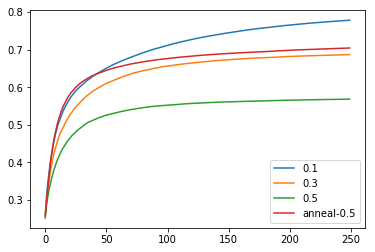

In [13]:
def アニールするεグリーディ法でアームを決定(ランダム行動の選択率ε,アームの配列,回数):
    ランダム行動の選択率ε = ランダム行動の選択率ε*(1/(回数+1)) # 引く回数が増えるとεが減る
    乱数_0から1まで = 乱数発生器.uniform(0, 1)
    # 乱数がε以上なら、平均報酬最大のアームを選択    
    if ランダム行動の選択率ε <= 乱数_0から1まで:
        平均報酬最大のインデックス=平均報酬最大のアームのインデックスを知る(アームの配列)
        return 平均報酬最大のインデックス
    # 乱数がε未満なら、ランダムなアーム
    else:
        return 乱数発生器.randint(len(アームの配列))

def アニールするεグリーディ法でシミュレーション(アームの配列,一回のシミュレーションで引く回数,シミュレーションの回数,ランダム行動の選択率ε):
    global 回数毎の平均報酬 # グローバル変数を弄るので    
    回数毎の平均報酬=[]
    
    for 回数 in range(一回のシミュレーションで引く回数):
        回数毎の平均報酬.append([]) # 空にする

    for このシミュレーション in range(シミュレーションの回数):
        このシミュレーションの報酬総額=0
        for このアーム in アームの配列:        
            このアーム.アームの初期化()
                    
        for この回 in range(一回のシミュレーションで引く回数):
            決めたアームのインデックス=アニールするεグリーディ法でアームを決定(ランダム行動の選択率ε,アームの配列,この回)
            このアーム=アームの配列[決めたアームのインデックス]
            得た報酬=このアーム.引く()
            このシミュレーションの報酬総額=このシミュレーションの報酬総額+得た報酬
            このシミュレーションの平均報酬=このシミュレーションの報酬総額/(この回+1)
            回数毎の平均報酬[この回].append(このシミュレーションの平均報酬)

εグリーディ法でシミュレーション(アームの配列,一回のシミュレーションで引く回数,シミュレーションの回数,0.1)
回数毎の平均報酬をプロット(0.1,一回のシミュレーションで引く回数)

εグリーディ法でシミュレーション(アームの配列,一回のシミュレーションで引く回数,シミュレーションの回数,0.3)
回数毎の平均報酬をプロット(0.3,一回のシミュレーションで引く回数)

εグリーディ法でシミュレーション(アームの配列,一回のシミュレーションで引く回数,シミュレーションの回数,0.5)
回数毎の平均報酬をプロット(0.5,一回のシミュレーションで引く回数)

アニールするεグリーディ法でシミュレーション(アームの配列,一回のシミュレーションで引く回数,シミュレーションの回数,0.5)
回数毎の平均報酬をプロット("anneal-0.5",一回のシミュレーションで引く回数)
plt.legend(loc='best')
plt.show()
# ↓待たされます

## 小出しの任意課題8) 
<span style="background-color:#FFFF99">アニールの式を変えてみましょう。<br />εをどのように減らしていくか、アイディアを出して結果を確かめましょう。</span><hr />

## 15) アームの当たる確率を変更して回数毎の平均報酬を図示<br />【注】 全体で20秒程度、待たされます

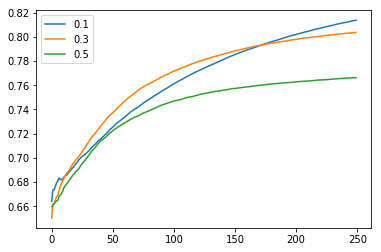

In [14]:
アーム1=アーム(0.6)
アーム2=アーム(0.6)
アーム3=アーム(0.6)
アーム4=アーム(0.6)
アーム5=アーム(0.9)
アームの配列=[アーム1,アーム2,アーム3,アーム4,アーム5]

εグリーディ法でシミュレーション(アームの配列,一回のシミュレーションで引く回数,シミュレーションの回数,0.1)
回数毎の平均報酬をプロット(0.1,一回のシミュレーションで引く回数)
εグリーディ法でシミュレーション(アームの配列,一回のシミュレーションで引く回数,シミュレーションの回数,0.3)
回数毎の平均報酬をプロット(0.3,一回のシミュレーションで引く回数)
εグリーディ法でシミュレーション(アームの配列,一回のシミュレーションで引く回数,シミュレーションの回数,0.5)
回数毎の平均報酬をプロット(0.5,一回のシミュレーションで引く回数)
plt.legend(loc='best')
plt.show()

## 小出しの任意課題9) 
<span style="background-color:#FFFF99">プログラム #15 で、各アームの当たる確率を好みの値に変えて実行してみましょう。</span><hr />

第14回第4章の演習はここまでです。お疲れさまでした。